In [4]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive



In [6]:
data_train=pd.read_csv("/content/drive/MyDrive/sign_mnist_train.csv")
data_test=pd.read_csv("/content/drive/MyDrive/sign_mnist_test.csv")

In [7]:
# In this section you will have to add another dimension to the data
#training_images = np.expand_dims(training_images, axis=3)
#testing_images = np.expand_dims(testing_images, axis=3)
training_images = data_train.iloc[:,1:].values
training_labels = data_train.iloc[:,0].values
testing_images = data_test.iloc[:,1:].values
testing_labels = data_test.iloc[:,0].values

# Reshape the data
training_images = training_images.reshape(-1, 28*28)
testing_images = testing_images.reshape(-1, 28*28)


print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 784)
(27455,)
(7172, 784)
(7172,)


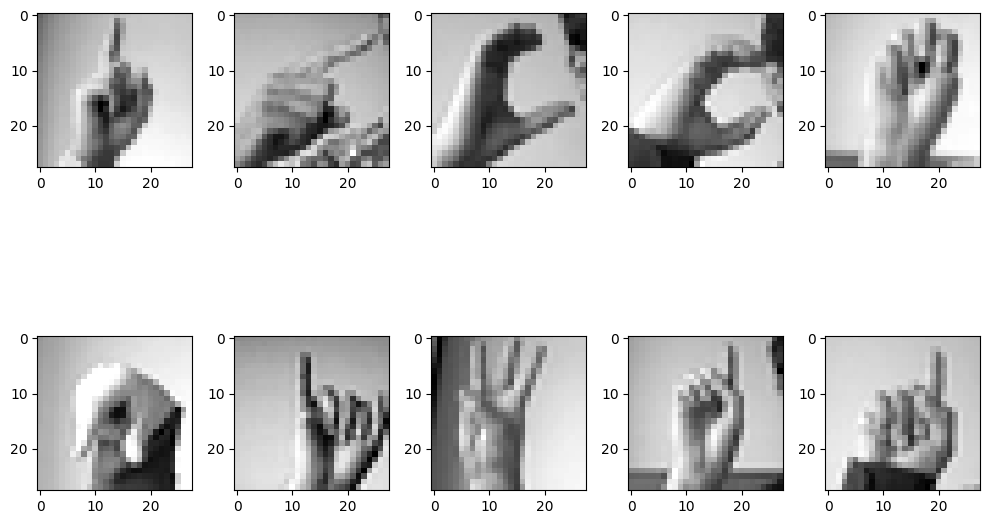

In [8]:
# Plotting the first 10 images
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,5)
fig.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [10]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)

# Keep These
print(training_images.shape)
print(testing_images.shape)

# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 784)
(7172, 784)


In [12]:
# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors
knn.fit(training_images, training_labels)





KNeighborsClassifier()

[ 6  5 22  0  3]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       331
           1       0.94      0.95      0.95       432
           2       0.94      1.00      0.97       310
           3       0.77      0.93      0.84       245
           4       0.81      0.96      0.88       498
           5       0.93      0.91      0.92       247
           6       0.91      0.94      0.92       348
           7       0.93      0.94      0.94       436
           8       0.86      0.66      0.75       288
          10       0.00      0.00      0.00       331
          11       0.00      0.00      0.00       209
          12       0.00      0.00      0.00       394
          13       0.14      0.12      0.13       291
          14       0.00      0.00      0.00       246
          15       0.00      0.00      0.00       347
          16       0.00      0.00      0.00       164
          17       0.00      0.00      0.00       144
          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

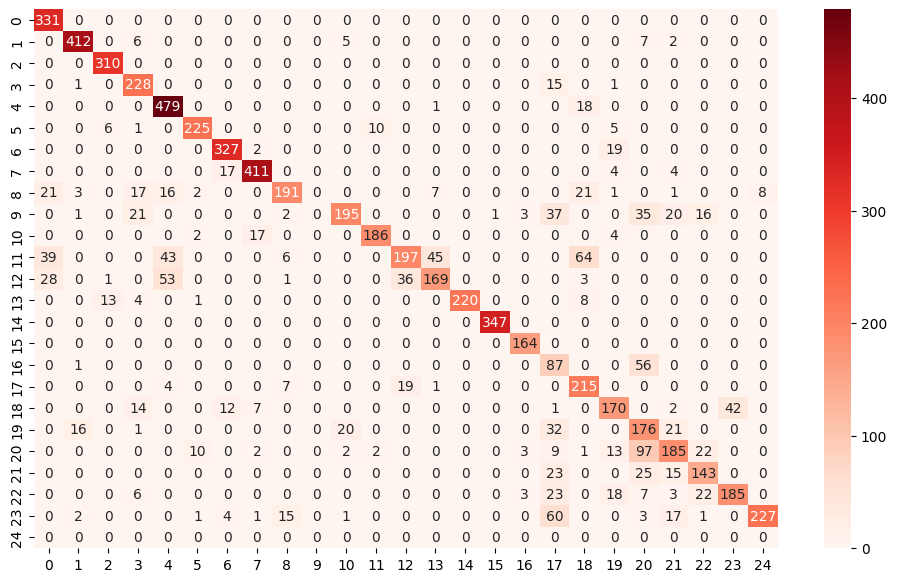

In [20]:
# Predictions
# Evaluate the model
predictions = knn.predict(testing_images)
# Adjusting predictions
predictions_adjusted = predictions.copy()  # Make a copy to avoid modifying original predictions array
predictions_adjusted[predictions_adjusted >= 9] += 1

# Output
print(predictions_adjusted[:5])




#Output
#array([ 6,  8, 11, 14, 18])

# Precision, recall, f1-score for all the classes
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

classes = ["Class " + str(i) for i in range(26) if i != 9]
print(classification_report(testing_labels, predictions_adjusted))

# Calculate accuracy
accuracy = np.mean(predictions_adjusted == testing_labels)
print('Accuracy:', accuracy)

# Visualize confusion matrix
cm = confusion_matrix(testing_labels, predictions_adjusted)
plt.figure(figsize=(12, 7))
sns.heatmap(cm, cmap='Reds', annot=True, fmt='')
plt.show()